In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [29]:
index_r = 0
index_p = 1

w_r = 0.0001
w_p = 0.1

def fake_data():
    rssi = np.random.uniform(low=-70, high=-30, size=50)
    phase = np.random.uniform(low=0, high=2*np.pi, size=50)
    return rssi, phase

def distance(r1, p1, r2, p2):
    return w_r*np.sum(np.square(r1-r2)) + w_p*np.sum(np.square(p1-p2))

In [31]:
r1, p1 = fake_data()
r2, p2 = fake_data()
distance(r1, p1, r2, p2)

38.58358583675338

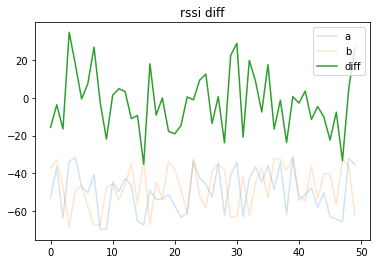

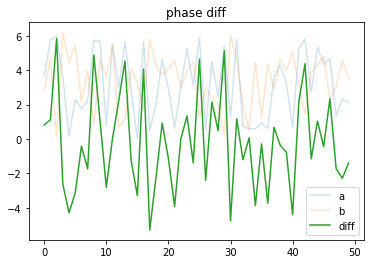

In [47]:
def plot(a, b, i, title):
    plt.plot(a[:, i], label='a', alpha=0.2)
    plt.plot(b[:, i], label='b', alpha=0.2)
    plt.plot(a[:, i]-b[:, i], label='diff')
    plt.title(title)
    plt.legend()
    plt.show()

plot(a, b, index_r, 'rssi diff')
plot(a, b, index_p, 'phase diff')

In [5]:
df = pd.read_hdf('../templates/open_tmplt.h5', 'vinegar')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3050 entries, 0 to 2979
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   DISTANCE  3050 non-null   float64
 1   CHANNEL   3050 non-null   float64
 2   RSSI      2980 non-null   float64
 3   PHASE     2980 non-null   float64
dtypes: float64(4)
memory usage: 119.1 KB


In [6]:
nan = df[np.isnan(df['PHASE'])]

In [7]:
df[df['DISTANCE']==260]

,DISTANCE,CHANNEL,RSSI,PHASE
2991,260.0,902.75,NaN,NaN
2992,260.0,903.25,NaN,NaN
2993,260.0,903.75,NaN,NaN
2994,260.0,904.25,NaN,NaN
2995,260.0,904.75,NaN,NaN
2996,260.0,905.25,NaN,NaN
2997,260.0,905.75,NaN,NaN
2998,260.0,906.25,NaN,NaN
2999,260.0,906.75,NaN,NaN
3000,260.0,907.25,NaN,NaN


In [2]:
templates = {}
with pd.HDFStore('../templates/open_tmplt.h5') as store:
    for key in store.keys():
        templates[key] = store.get(key)


In [7]:
for key in templates:
    print(key)

/empty
/oil2
/vinegar
/water


In [11]:
d_v = templates['empty']

KeyError: 'empty'

In [37]:
d_v

,DISTANCE,CHANNEL,RSSI,PHASE
0,30.0,902.75,-41.997487,3.321169
1,30.0,903.25,-42.000000,3.164040
2,30.0,903.75,-42.000000,3.047056
3,30.0,904.25,-41.500000,2.882928
4,30.0,904.75,-41.500000,2.774886
...,...,...,...,...
2998,300.0,925.25,NaN,NaN
2999,300.0,925.75,NaN,NaN
2846,300.0,926.25,-67.002513,4.713561
2847,300.0,926.75,-66.994975,4.708011


In [5]:
df = pd.DataFrame(data={'a': [1, 2, 3], 'b':[4, 5, 6]})

In [9]:
grouped = df.groupby('a')

In [53]:
list(grouped.groups.keys())

[1, 2, 3]

In [20]:
a.shape

(3,)

In [22]:
df['a'].values.reshape(3, 1)

array([[1],
       [2],
       [3]], dtype=int64)

In [32]:
df['a'].array

<PandasArray>
[1, 2, 3]
Length: 3, dtype: int64

In [12]:
s = '/qwer'

In [28]:
rssi = np.random.uniform(low=-70, high=-30, size=50)
phase = np.random.uniform(low=0, high=2*np.pi, size=50)
np.concatenate(rssi, phase)

TypeError: only integer scalar arrays can be converted to a scalar index

array([-48.13398219, -61.41266691, -45.22710886, -46.16200903,
       -30.77510482, -67.12444793, -42.04195076, -44.77256913,
       -49.99843403, -61.15866855, -32.66303834, -39.43132536,
       -63.13961725, -42.33159453, -46.45455017, -37.56505069,
       -42.15898791, -64.2522899 , -39.12370485, -68.65006247,
       -38.17256797, -60.14404102, -35.96660578, -56.64766095,
       -30.5575873 , -48.70592101, -60.45850214, -40.70331245,
       -44.81879171, -33.03186734, -32.70124253, -33.30096472,
       -63.15478189, -54.62818603, -33.40798309, -62.43273952,
       -53.01111028, -63.57437566, -45.50663431, -50.58936416,
       -40.55043336, -38.2193488 , -40.26643722, -42.40773426,
       -44.42294718, -42.62468474, -39.78542789, -55.73436664,
       -31.07471687, -44.03624037])

In [38]:
a = np.array([1, np.nan,3])
b = np.array([2, 4, 4])
sum((a-b)**2)

nan

In [39]:
a.shape

(3,)

In [4]:
np.random.randint(10)

8